**Aluno:** Alexandre Esposte Santos

**Data:** 01/09/2023

**Atividade:** Tarefa 1 - Clustering Application

**Demandas / Objetivos:**

1. Find a dataset to apply the clusterization. Ideally, a science related one.

2. The dataset must be composed of several features. At least 4 features.

3. Since you have 4, or more features, visualization will be a problem. Apply a PCA reduce the feature space to 2 or 3 in order to make visualization possible.

4. Apply the K-means algorithm to all the features set.


In [1]:
# Importando os pacotes necessários para essa atividade

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [2]:
# Definindo o caminho do dataset 
path = "../datasets/estrelas.csv"

# Carregando o dataset
data = pd.read_csv(path)

O conjunto de dados adotado tem como objetivo a classificação de estrelas a partir das seguintes variáveis

> - Temperatura absoluta (em kelvin)
>
> - Luminosidade relativa ao sol ($\frac{L}{L_0}$)
>
> - Raio relativo ao do sol ($\frac{R}{R_0}$)
>
> - Magnitude absoluta ($M_v$)
>   - A magnitude de uma estrela é uma medida da sua luminosidade observada a partir da Terra. Essa medida pode ser utilizada para comparar o brilho relativo de diferentes estrelas no céu. Esse número não representa uma medida direta da luminosidade absoluta ou do tamanho da estrela, por outro lado, essa magnitude reflete como vemos as características da estrela a partir da Terra.
>

> - Cor da estrela (branca, vermelha, azul, amarela e etc...)

> - Classe espectral (O, B, A, F, G, K, M) (ref: <a href= https://en.wikipedia.org/wiki/Stellar_classification> Wikipedia</a>)
>   - Cada estrela no universo possui suas próprias características únicas, como temperatura, tamanho e brilho. A classe espectral de uma estrela é uma maneira de categorizar essas estrelas com base em suas propriedades físicas, especificamente em relação à temperatura de suas camadas externas, conhecidas como fotosfera. A medida de "ionização" está relacionada com a quantidade de átomos que perderam elétrons para se tornarem íons na atmosfera da estrela. Isso também está relacionado à temperatura, pois temperaturas mais altas levam a uma maior ionização. 
>
>   - Portanto, a classe espectral de uma estrela é uma forma abreviada de comunicar informações essenciais sobre sua temperatura e estado de ionização. Isso ajuda os astrônomos a entenderem melhor as estrelas.
>
>   - A fotosfera é a camada visível mais externa de uma estrela. É a parte da estrela que emitiria a luz visível que podemos detectar da Terra. A fotosfera é considerada a "superfície" da estrela, embora não seja uma superfície sólida como a da Terra.
>
>    - Na fotosfera, ocorrem muitos processos importantes que afetam o comportamento e as características observáveis da estrela. A temperatura da fotosfera é um fator fundamental que determina a cor e o brilho da estrela. Estrelas mais quentes tendem a ser mais brilhantes e têm uma coloração mais azulada, enquanto estrelas mais frias têm uma coloração avermelhada e são menos brilhantes.
>
>   - A sequência de classes espectrais, em ordem decrescente de temperatura, é O, B, A, F, G, K e M. As estrelas da classe O são as mais quentes, enquanto as estrelas da classe M são as mais frias. 
>
>
>
>

> - Tipo da estrela: Esse é o nosso target, utilizaríamos essa coluna como rótulo caso o nosso problema fosse de classificação.
>     - As classes são : Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants


O conjunto de dados, as informações e as imagens foram todas obtidas dos links a seguir:

* <a href=https://www.kaggle.com/datasets/deepu1109/star-dataset>Kaggle 1 </a>

* <a href=https://www.kaggle.com/datasets/brsdincer/star-type-classification> Kaggle 2</a>

*  <a href= https://en.wikipedia.org/wiki/Stellar_classification> Wikipedia</a>

<img src =https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Morgan-Keenan_spectral_classification.svg/260px-Morgan-Keenan_spectral_classification.svg.png >

![Alt text](inbox_3791628_fe9436bf4e2d23b5b18fb3db1f1fcbcb_HRDiagram.png)

![Alt text](inbox_3791628_14338bbebf77d18e1faef582bccdbdd6_hr.jpg)

Originalmente o nosso target está com a variável/coluna com uma codificação numérica mas vamos fazer um pré processamento visando criar uma nova coluna contendo o tipo da estrela no formato texto. Segue abaixo a codificação apresentada no dataset:

> * Red Dwarf - 0
> 
> * Brown Dwarf - 1
> 
> * White Dwarf - 2
> 
> * Main Sequence - 3
> 
> * Super Giants - 4
> 
> * Hyper Giants - 5

A seguir a base de dados original

In [3]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# Renomeando as colunas e adicionando a coluna de tipo categórica

data.columns = ['temperatura', 'luminosidade', 'raio', 'magnitude', 'cor', 'classe_espectral' ,'tipo_codificado']

# Criando uma nova coluna
condicoes = [(data['tipo_codificado'] == 0),
             (data['tipo_codificado'] == 1), 
             (data['tipo_codificado'] == 2),
             (data['tipo_codificado'] == 3), 
             (data['tipo_codificado'] == 4),
             (data['tipo_codificado'] == 5)
            ]

classificacao = ['ana vermelha', 'ana marrom', 'ana branca','sequencia principal', 'gigante', 'supergigante' ]

data['tipo'] = np.select(condicoes, classificacao)

Base de dados organizada

In [5]:
# Agora nosso dataset está arrumado
data.head()

,temperatura,luminosidade,raio,magnitude,cor,classe_espectral,tipo_codificado,tipo
0,3068,0.002400,0.1700,16.12,Red,M,0,ana vermelha
1,3042,0.000500,0.1542,16.60,Red,M,0,ana vermelha
2,2600,0.000300,0.1020,18.70,Red,M,0,ana vermelha
3,2800,0.000200,0.1600,16.65,Red,M,0,ana vermelha
4,1939,0.000138,0.1030,20.06,Red,M,0,ana vermelha


Verificando valores nulos e duplicados

In [6]:
data.isna().sum().to_frame(name='N° de faltantes')

,N° de faltantes
temperatura,0
luminosidade,0
raio,0
magnitude,0
cor,0
classe_espectral,0
tipo_codificado,0
tipo,0


Está sendo considerado como dado duplicado aquele cujas todas as colunas de uma linha/instância são iguais a todas as colunas de uma outra linha/instância

In [7]:
data.duplicated().sum()

0

**Conclusão:** Não há dados faltantes e nem dados duplicados.

Plotando a luminosidade em função da temperatura para obtermos o diagrama de Hertzsprung-Russell. 

Observe a similaridade deste gráfico com os gráficos apresentados no inicio.

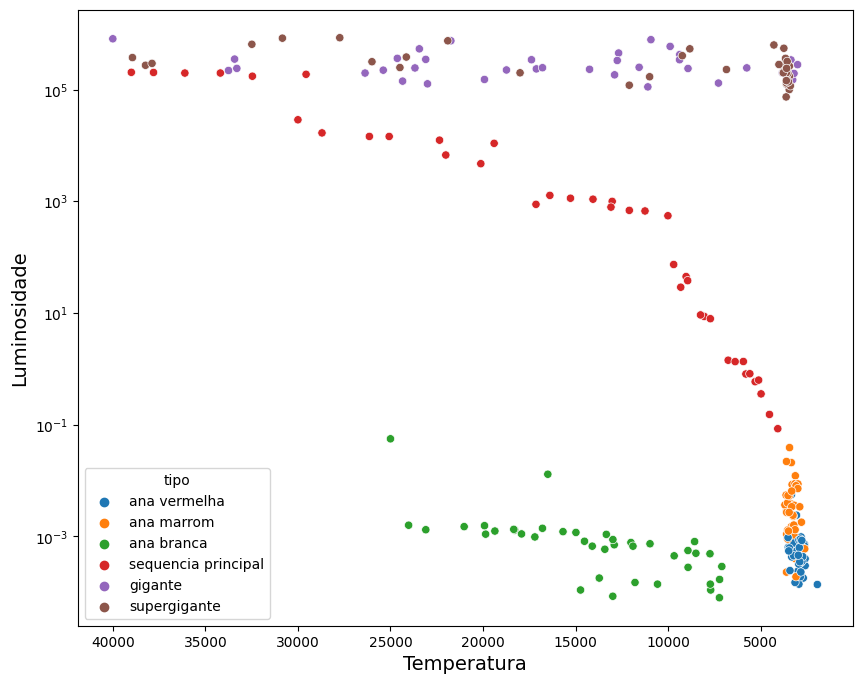

In [8]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=data,x='temperatura',y='luminosidade',hue='tipo')
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_ylabel('Luminosidade',size=14)
ax.set_xlabel('Temperatura', size=14);

Podemos ir além e plotar todos os gráficos de uma unica vez utilizando o método pairplot encontrado no pacote seaborn

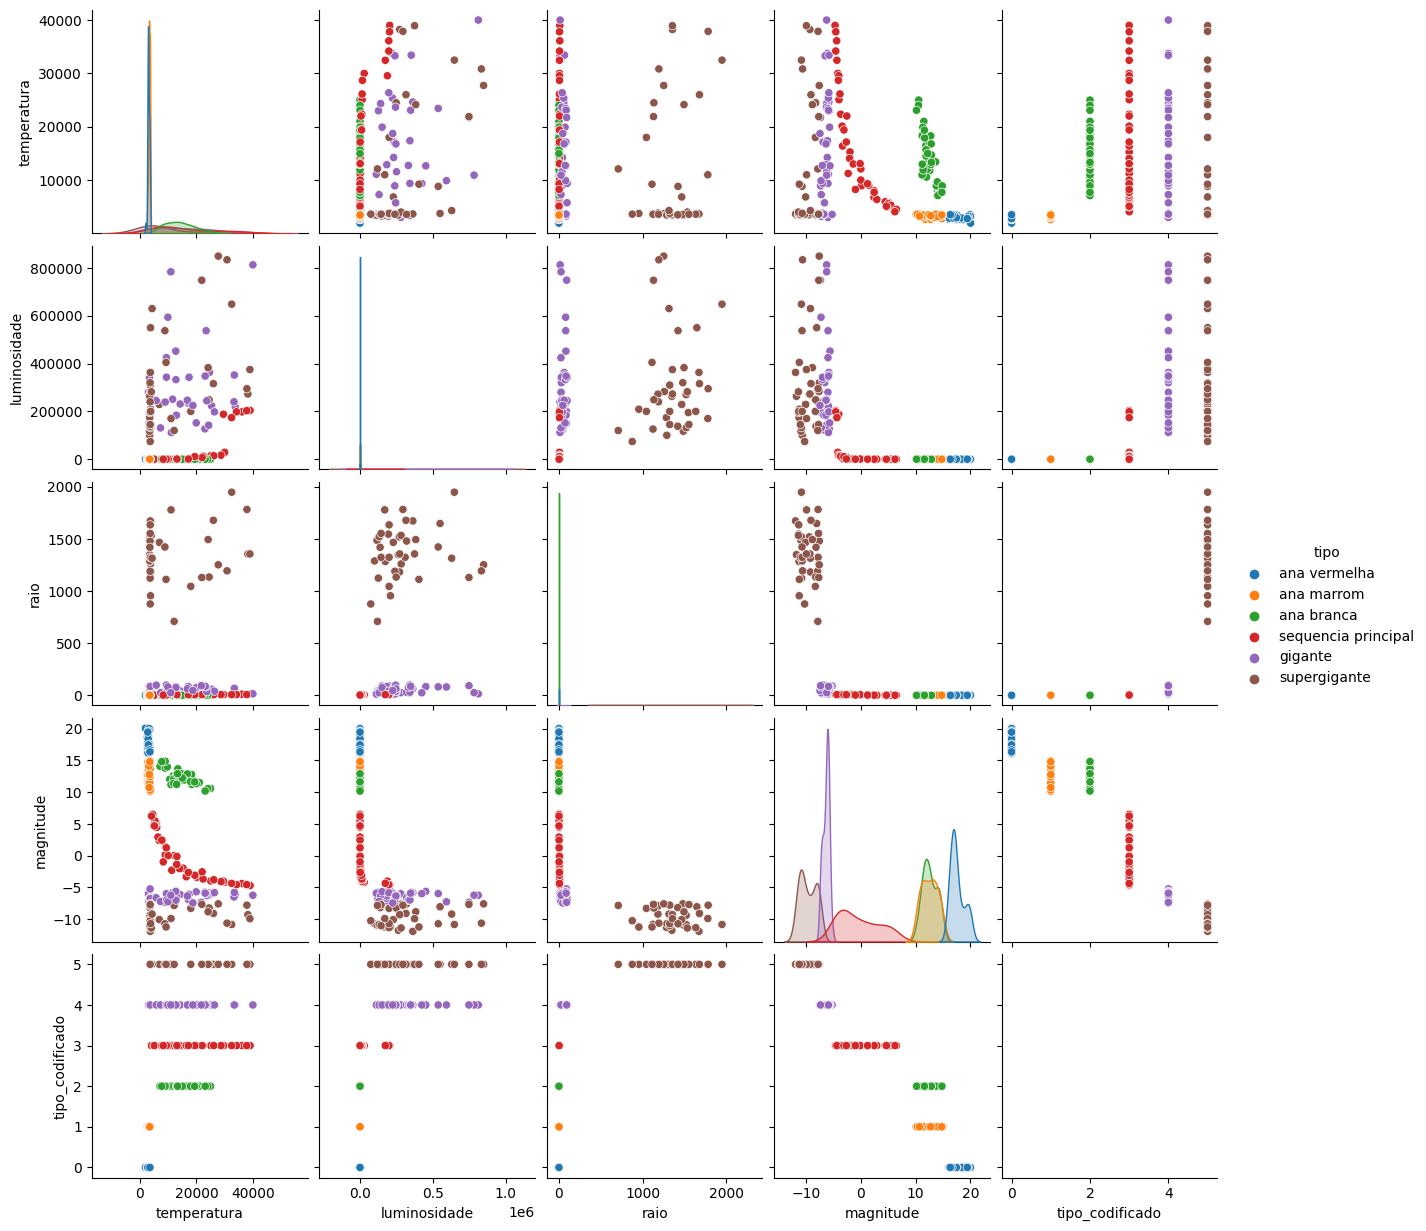

In [9]:
sns.pairplot(data,hue='tipo')

>* Notamos que cada tipo de estrela tem características especificas de luminosidade, temperatura e tamanho. Nesta situação não seria necessário a utilização de PCA, mas como o intuito da atividade é a aplicação desse método então devemos trilhar por esse caminho.
>
>* Nos nossos dados há variáveis categóricas, portanto, devemos aplicar um método de encoder para representa-las numericamente. Estarei utilizando para isso o OneHotEncoder.
>
>* Dessa maneira vamos estar representando os categóricos de forma numérica, mas uma de suas desvantagens é justamente o aumento da dimensionalidade do dataset, o que no nosso contexto não é ruim pois justificará ainda mais a aplicação do método PCA para a redução de dimensionalidade

# Aplicando o encoder

Vamos remover as variáveis tipo_codificado e tipo, pois elas representam o nosso target. No nosso contexto elas serão utilizadas para validar a clusterização.

In [10]:
X = data.drop(columns=['tipo','tipo_codificado'])

Aplicando o encoder

In [11]:
encoded = pd.get_dummies(data[['cor','classe_espectral']])
Xencoded = pd.concat([X, encoded],axis=1)
Xencoded = Xencoded.drop(columns=['cor','classe_espectral'])

* Através do encoder nós alteramos a representação das categóricas para numéricas mas ao mesmo passo aumentos a dimensionalidade da nossa base de dados.

* Antes tínhamos 6 colunas (sem considerar o target) e agora temos 28 colunas.

In [12]:
Xencoded.head()

,temperatura,luminosidade,raio,magnitude,cor_Blue,cor_Blue White,cor_Blue white,cor_Blue-White,cor_Blue-white,cor_Orange,...,cor_white,cor_yellow-white,cor_yellowish,classe_espectral_A,classe_espectral_B,classe_espectral_F,classe_espectral_G,classe_espectral_K,classe_espectral_M,classe_espectral_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Agora vamos padronizar nossos dados através do método StandardScaler do sklearn. A transformação feita por esse método está expressa a seguir:

$x_{new} = \dfrac{x - x_{mean}}{x_{std}}$

In [13]:
scaler = StandardScaler().set_output(transform='pandas')

X_tratado = scaler.fit_transform(Xencoded)

Agora a nossa base está tratada e estamos prontos para aplicar o PCA.

In [14]:
X_tratado.head()

,temperatura,luminosidade,raio,magnitude,cor_Blue,cor_Blue White,cor_Blue white,cor_Blue-White,cor_Blue-white,cor_Orange,...,cor_white,cor_yellow-white,cor_yellowish,classe_espectral_A,classe_espectral_B,classe_espectral_F,classe_espectral_G,classe_espectral_K,classe_espectral_M,classe_espectral_O
0,-0.779382,-0.598624,-0.459210,1.116745,-0.551677,-0.208514,-0.130189,-0.064685,-0.348562,-0.09167,...,-0.112509,-0.185695,-0.09167,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
1,-0.782110,-0.598624,-0.459241,1.162414,-0.551677,-0.208514,-0.130189,-0.064685,-0.348562,-0.09167,...,-0.112509,-0.185695,-0.09167,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
2,-0.828477,-0.598624,-0.459342,1.362213,-0.551677,-0.208514,-0.130189,-0.064685,-0.348562,-0.09167,...,-0.112509,-0.185695,-0.09167,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
3,-0.807496,-0.598624,-0.459229,1.167171,-0.551677,-0.208514,-0.130189,-0.064685,-0.348562,-0.09167,...,-0.112509,-0.185695,-0.09167,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
4,-0.897819,-0.598624,-0.459340,1.491607,-0.551677,-0.208514,-0.130189,-0.064685,-0.348562,-0.09167,...,-0.112509,-0.185695,-0.09167,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214


## PCA

Estarei considerando o máximo de componentes principais para podermos analisar o quanto delas se faz necessário para explicar nossos dados.

In [15]:
pca = PCA().set_output(transform='pandas')

Xpca = pca.fit_transform(X_tratado)


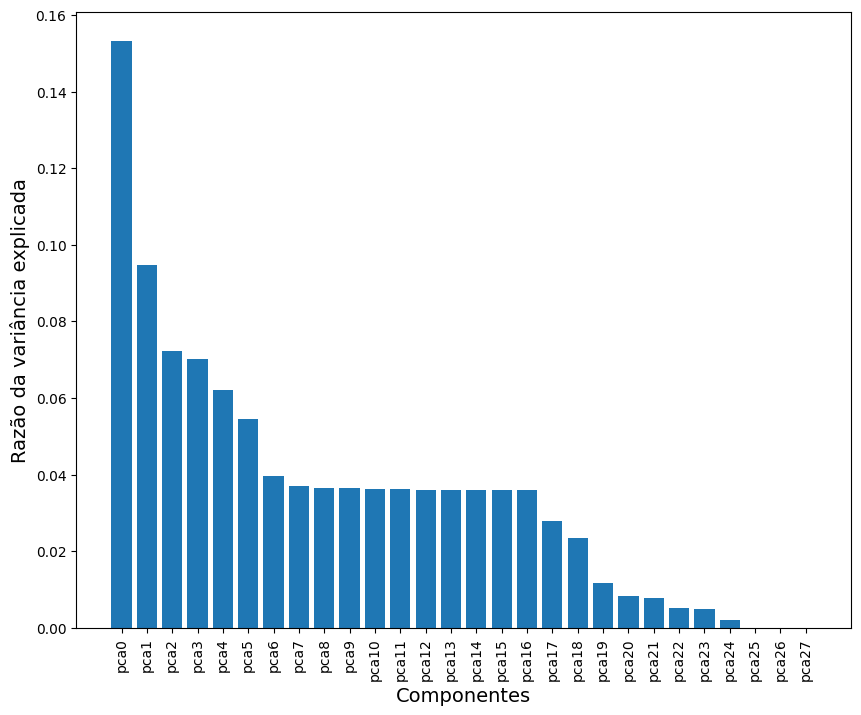

In [16]:
eixos = Xpca.columns

importancia = pca.explained_variance_ratio_

plt.figure(figsize=(10,8))
plt.bar(x=eixos,height= importancia)
plt.ylabel('Razão da variância explicada',size=14)
plt.xlabel('Componentes',size=14)
plt.xticks(rotation=90);


Observamos que as 3 primeiras componentes explicam 32% dos nossos dados originais

In [17]:
importancia[0:3].sum()*100

32.009601829333825

Vamos selecionar somente as 3 primeiras como solicitado na tarefa.

In [18]:
Xfinal = Xpca.loc[:,'pca0':'pca2']

Reduzimos a nossa base de 28 variáveis para 3.

In [19]:
Xfinal.head()

,pca0,pca1,pca2
0,-2.264714,0.380934,-0.224996
1,-2.280471,0.369181,-0.226976
2,-2.363835,0.320110,-0.232240
3,-2.292630,0.369666,-0.224704
4,-2.434291,0.291023,-0.231767


> * Agora vamos aplicar os métodos de clusterização.
>
> * Para validar estaremos utilizando  o diagrama de  Hertzsprung-Russell plotado mais cedo nesse trabalho

## Kmeans

Da nossa análise inicial nós sabemos que há 6 tipos de estrelas e isso pode ser entendido como 6 clusters/grupos. Nosso objetivo no kmeans se resume em escolher a quantidade de clusters adequada para que cada agrupamento represente da melhor forma possível os grupos existentes nos nossos dados. 

Em um contexto prático/real acredito ser um tanto quanto complicado determinar exatamente o número de clusters adequado a ser utilizado. Como exemplo, note o diagrama de Hertzsprung-Russell plotado por mim. É possível observar agrupamentos, mas seria impraticável distinguirmos as estrelas gigantes das supergigantes, as anãs vermelhas das anãs marrons e assim por diante.

Portanto, vou por meio da análise do erro determinar qual a quantidade de clusters mais indicada.

Para essa tarefa vou estar utilizando um método simples conhecido como método do cotovelo ou elbow method.

In [20]:
nclusters = 20

erro =[]
cluster = []
for n in range(1, nclusters+1):
    kmeans = KMeans(n_clusters= n, n_init='auto' ,random_state=0)
    kmeans.fit(Xfinal)
    cluster.append(n)
    erro.append(kmeans.inertia_)

No gráfico a seguir podemos notar como o erro (inertia_) se comporta para cada quantidade de cluster. Notamos que o cotovelo é algo entre 4 ou 5 clusters.

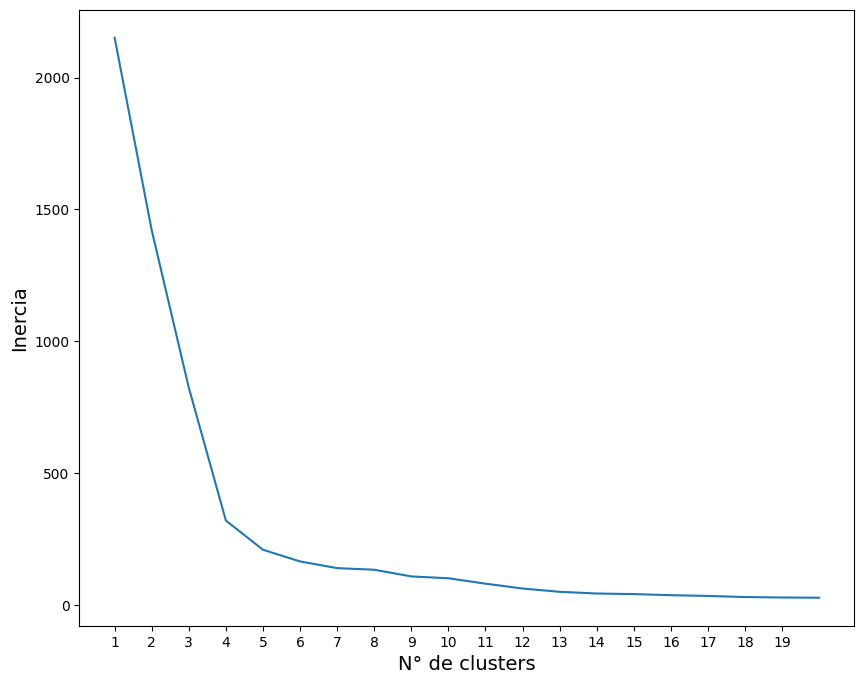

In [21]:
plt.figure(figsize=(10,8))
sns.lineplot(x=cluster,y=erro)
plt.ylabel('Inercia',size=14)
plt.xlabel('N° de clusters',size=14)
plt.xticks([x for x in range(1,20)]);

Estarei tomando como 5 a quantidade de clusters

In [22]:
# Instanciando o modelo
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=0)

# Determinando os centroides
kmeans.fit(Xfinal)

# Adicionando os rótulos provenientes do kmeans na tabela com os eixos principais
Xfinal['cluster_kmeans'] = kmeans.labels_

# Adicionando os rótulos provenientes do kmenas na tabela original
data['cluster_kmeans'] = kmeans.labels_

Xfinal.head()

/tmp/ipykernel_24603/118469659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xfinal['cluster_kmeans'] = kmeans.labels_


,pca0,pca1,pca2,cluster_kmeans
0,-2.264714,0.380934,-0.224996,1
1,-2.280471,0.369181,-0.226976,1
2,-2.363835,0.320110,-0.232240,1
3,-2.292630,0.369666,-0.224704,1
4,-2.434291,0.291023,-0.231767,1


A seguir está apresentado todas as possíveis projeções das três componentes principais. Observamos que de fato o PCA aparentemente "dispersou" melhor os dados quando comparamos com o primeiro pairplot que efetuamos. 

<Figure size 2000x800 with 0 Axes>

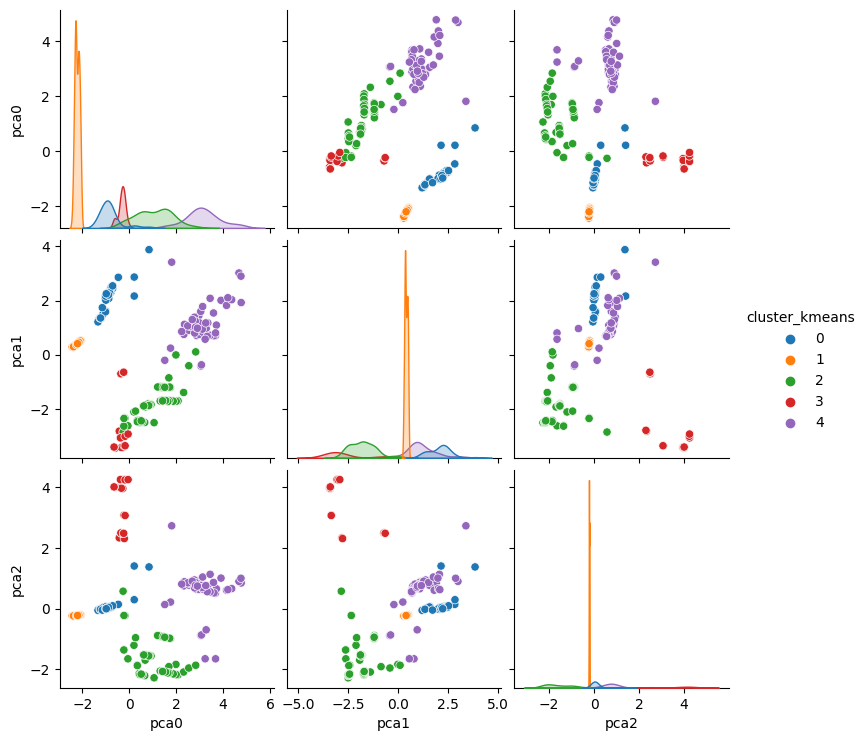

In [23]:
plt.figure(figsize=(20,8))
sns.pairplot(data=Xfinal, hue='cluster_kmeans', palette='tab10')

O gráfico 3d interativo a seguir foi feito com o pacote plotly. Nele atribuímos cada componente principal a um eixo do gráfico e podemos notar que os dados estão bem distribuídos ao longo do espaço. Isto é, notamos que de fato cada agrupamento, aparentemente, encontra-se em uma região diferente. 

In [24]:
import plotly.express as px

fig = px.scatter_3d(Xfinal, x='pca0', y='pca1', z='pca2',
              color='cluster_kmeans')
              
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Para fins de validação nós transferimos os labels gerados pelo kmeans para a base de dados original. Dessa forma podemos comparar os nosso resultados com os esperados.

Na próxima imagem observamos à esquerda o agrupamento por Kmeans e à direita o diagrama de Hertzsprung-Russell.

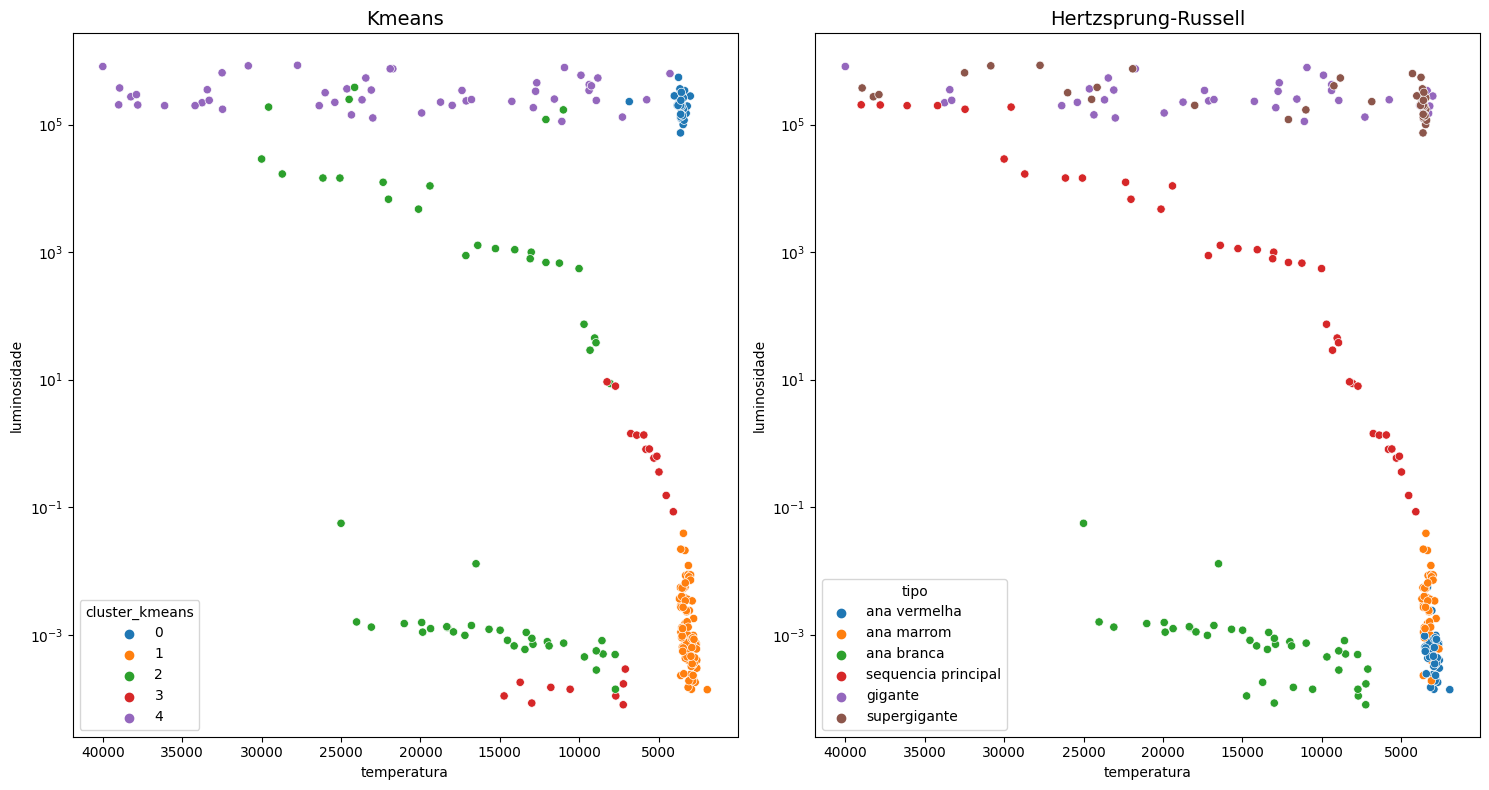

In [25]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

sns.scatterplot(data=data,x='temperatura',y='luminosidade',hue='cluster_kmeans',ax=ax[0], palette='tab10')
ax[0].set_yscale('log')
ax[0].invert_xaxis()
ax[0].set_title('Kmeans',fontsize=14)

sns.scatterplot(data=data,x='temperatura',y='luminosidade',hue='tipo',ax=ax[1])
ax[1].set_yscale('log')
ax[1].invert_xaxis()
ax[1].set_title('Hertzsprung-Russell',fontsize=14)

plt.tight_layout()

**Conclusão:** O resultado que obtemos não satisfaz completamente o que almejamos, apesar do pca e do agrupamento terem sido um sucesso. A nossa hipótese para isso pode ser formulada através de uma análise minuciosa dos dados obtidos na pca exibidos no primeiro pairplot algumas células acima. 

* É notável a diferença na dispersão de cada grupo, além disso, podemos facilmente concluir que os conjuntos formados não necessariamente são convexos. Provavelmente esses são os dois principais motivos pelo qual o nosso modelo de agrupamento Kmeans não entrega resultados melhores.

* Outro fator que pode influenciar na performance do modelo se trata exatamente do pré processamento dos dados. Como encoder utilizamos o OneHot e obtivemos uma matriz de dados esparsa. Outra situação que podemos notar se trata da tabela obtida logo após a seleção das três componentes. Observamos que a primeira componente (pca0) tem uma escala diferente das demais componentes, e essa diferença entre escalas pode ter prejudicado o nosso modelo.

* Dessa forma concluímos que há muitos fatores que podem influenciar na performance do nosso modelo, e seria necessário realizar varias abordagens em diferentes etapas do projeto para determinarmos qual é a pipeline de transformações mais adequada.

* Também é notável que algumas estrelas estão praticamente sobrepostas às outras. Como exemplo podemos ver as anãs vermelhas com as anãs marrons ou as gigantes com as supergigantes. Obviamente falamos isso utilizando a projeção das instâncias no plano formado pelas variáveis luminosidade vs temperatura, entretanto, esse comportamento pode ser diferente caso visto em outras projeções. No mais, podemos aplicar transformações matemáticas buscando uma maior separação das classes, facilitando assim o agrupamento.